In [2]:
import re
import emoji
from datasets import load_dataset
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
# region
hand_made_review_dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Handmade_Products")
hand_made_review_dataset["full"]
# endregion

C:\Users\sapar\AppData\Local\Programs\Python\Python311\Lib\site-packages\datasets\load.py:1429: FutureWarning: The repository for McAuley-Lab/Amazon-Reviews-2023 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/McAuley-Lab/Amazon-Reviews-2023
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 664162
})

In [4]:
hand_made_review_dataset["full"][0]

{'rating': 5.0,
 'title': 'Beautiful colors',
 'text': 'I bought one for myself and one for my granddaughter',
 'images': [],
 'asin': 'B08GPJ1MSN',
 'parent_asin': 'B08GPJ1MSN',
 'user_id': 'AF7OANMNHQJC3PD4HRPX2FATECPA',
 'timestamp': 1621607495111,
 'helpful_vote': 1,
 'verified_purchase': True}

In [5]:
cols_to_remove = ["images", "asin", "parent_asin", "user_id", "timestamp"]
hand_made_review_dataset = hand_made_review_dataset.remove_columns(cols_to_remove)
hand_made_review_dataset

DatasetDict({
    full: Dataset({
        features: ['rating', 'title', 'text', 'helpful_vote', 'verified_purchase'],
        num_rows: 664162
    })
})

In [6]:
def get_pandas_df(dataset):
    dataset.set_format("pandas")
    df = dataset[:]
    dataset.reset_format()
    return df

In [9]:
df = get_pandas_df(hand_made_review_dataset["full"])
df.head()

,rating,title,text,helpful_vote,verified_purchase
0,5.0,Beautiful colors,I bought one for myself and one for my grandda...,1,True
1,5.0,You simply must order order more than one!,I’ve ordered three bows so far. Have not been ...,0,True
2,5.0,Great,As pictured. Used a frame from the dollar stor...,0,True
3,5.0,Well made and so beautiful,"This is beyond beautiful. So shiny, the size ...",2,True
4,5.0,Smells just like the real thing!,Oh wow what a pleasant surprise! This smells g...,1,True


<Axes: >

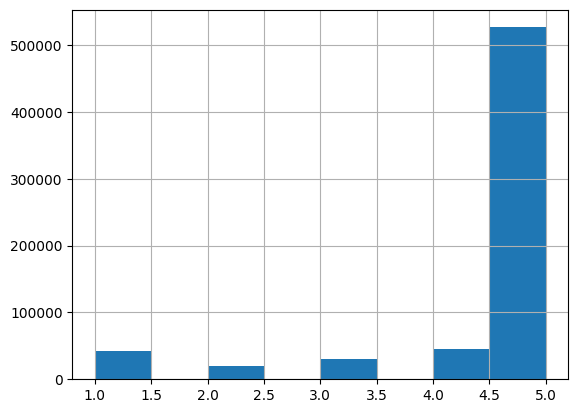

In [76]:

bin_edges = [1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.]
df["rating"].hist(bins=bin_edges)
# plt.close()


In [22]:
df["rating"].unique()

array([5., 4., 1., 3., 2.])

In [7]:
def get_value_counts(df):
    rating_counts = df['rating'].value_counts().sort_index()
    print(rating_counts)
    plt.figure(figsize=(8, 5))
    bars = plt.bar(
        x=rating_counts.index.astype(str),  # Convert to string for discrete labels
        height=rating_counts.values
    )

rating
1.0     41592
2.0     20531
3.0     29944
4.0     45247
5.0    526848
Name: count, dtype: int64


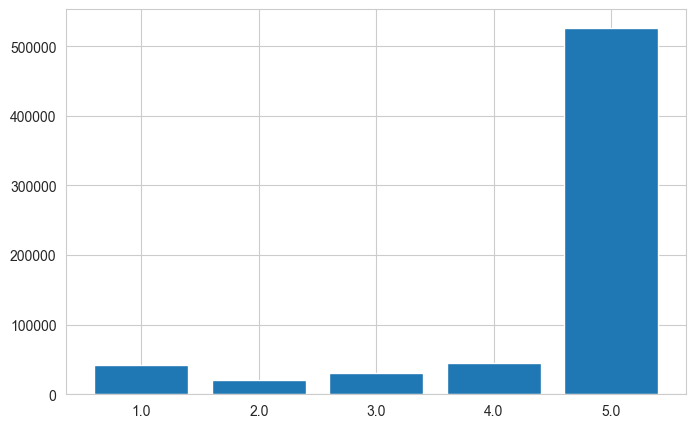

In [10]:
get_value_counts(df)

In [10]:
df["rating"].describe()

count    664162.000000
mean          4.498472
std           1.130100
min           1.000000
25%           5.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [23]:
title_length = df["title"].str.count(' ') + 1
title_length.describe()

count    664162.000000
mean          3.451727
std           2.778449
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          46.000000
Name: title, dtype: float64

<Axes: >

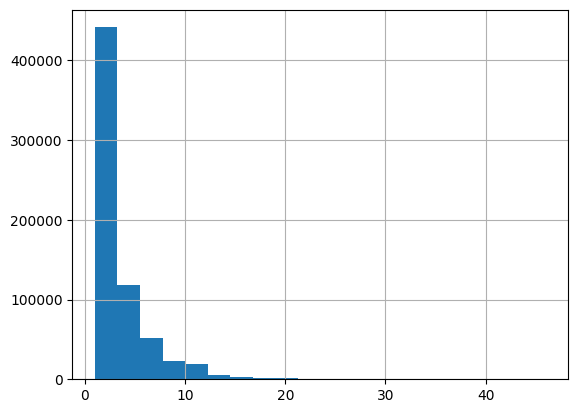

In [24]:
title_length.hist(bins=20)

In [26]:
review_length = df["text"].str.count(" ") + 1
review_length.describe()

count    664162.000000
mean         25.442254
std          29.792288
min           1.000000
25%           8.000000
50%          17.000000
75%          33.000000
max        1726.000000
Name: text, dtype: float64

<Axes: >

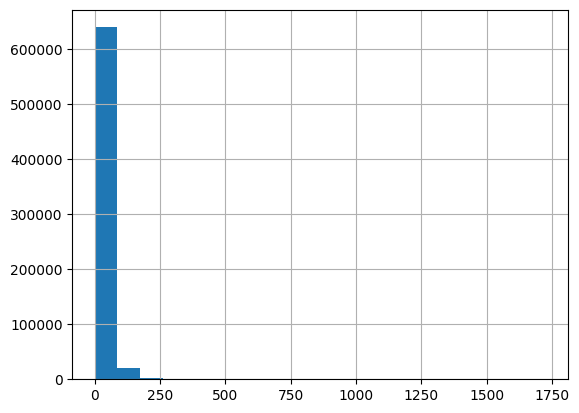

In [27]:
review_length.hist(bins=20)

<Axes: title={'center': 'title_word_count'}, xlabel='rating'>

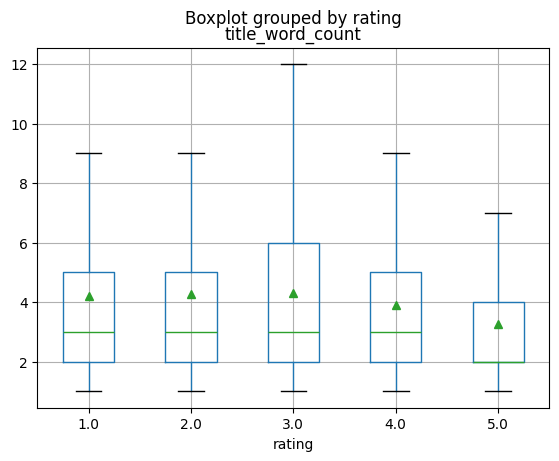

In [28]:
df["title_word_count"] = df["title"].apply(lambda x: len(x.split(" ")))
df.boxplot(column="title_word_count", by="rating", showfliers=False, showmeans=True)

<Axes: title={'center': 'title_word_count'}, xlabel='rating'>

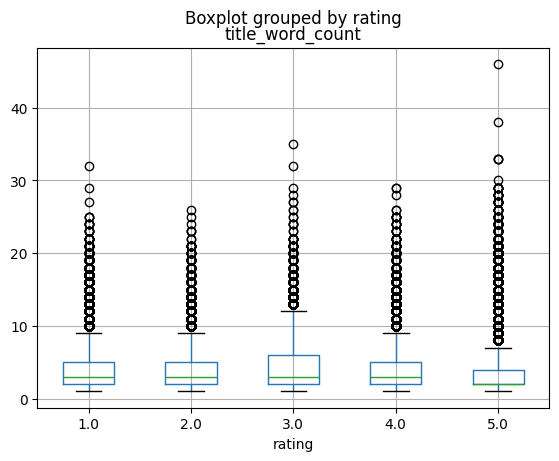

In [29]:
df.boxplot(column="title_word_count", by="rating", showfliers=True)

<Axes: title={'center': 'review_word_count'}, xlabel='rating'>

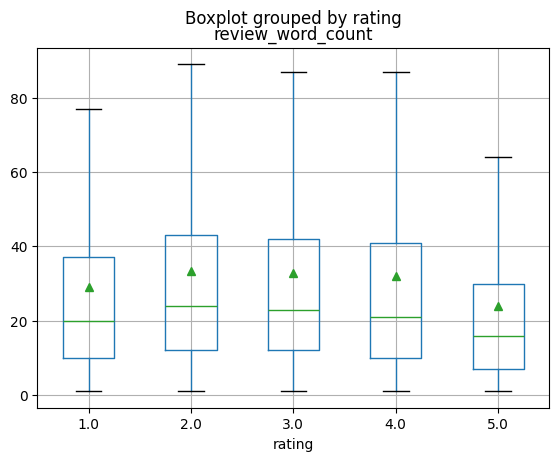

In [30]:
df["review_word_count"] = df["text"].apply(lambda x: len(x.split(" ")))
df.boxplot(column="review_word_count", by="rating", showfliers=False, showmeans=True)

<Axes: title={'center': 'review_word_count'}, xlabel='rating'>

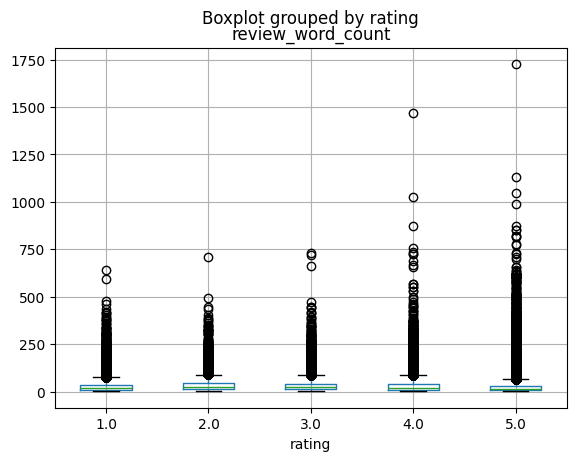

In [31]:
df.boxplot(column="review_word_count", by="rating", showfliers=True)

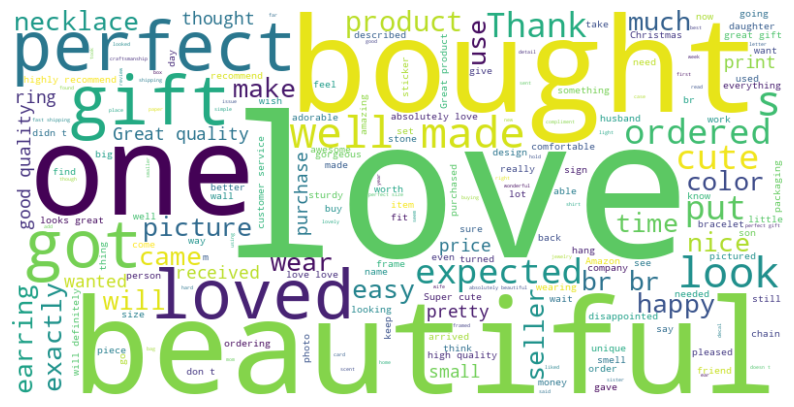

In [32]:
from wordcloud import WordCloud
all_reviews = " ".join(df["text"].astype(str))
wc = WordCloud(background_color="white",width=800, height=400).generate(all_reviews)
plt.figure(figsize = (10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
long_review = df.loc[(df["text"].str.count(" ") + 1) > 500]
long_review

,rating,title,text,helpful_vote,verified_purchase,title_word_count,review_word_count
80,5.0,Excellent workmanship and beautiful and heavy ...,I dropped my previous very cheap wall clock an...,0,True,16,508
706,4.0,WHY I edited from ONE star to FOUR stars,EDIT: Vendor DID make name larger. While I w...,0,True,9,567
2071,5.0,Love these rings! The colors are awesome! (P...,"To begin, I have purchased each of the followi...",12,True,14,602
2072,5.0,"Awesome, wearable fidget!","To begin, I have purchased each of the followi...",12,True,3,602
2073,5.0,"Great weight, solid! Nice movement. Recommend...","To begin, I have purchased each of the followi...",8,True,10,602
...,...,...,...,...,...,...,...
628984,5.0,DO NOT PASS THEM BY,"Literally, this is my first Amazon review. I k...",6,True,5,618
628985,5.0,DO NOT PASS THEM BY,"Literally, this is my first Amazon review. I k...",8,True,5,618
628986,5.0,DO NOT PASS THEM BY,"Literally, this is my first Amazon review. I k...",5,True,5,618
628987,5.0,DO NOT PASS THEM BY,"Literally, this is my first Amazon review. I k...",0,True,5,618


In [34]:
hand_made_review_dataset.reset_format()
hand_made_review_dataset["full"][0]

{'rating': 5.0,
 'title': 'Beautiful colors',
 'text': 'I bought one for myself and one for my granddaughter',
 'helpful_vote': 1,
 'verified_purchase': True}

In [160]:
text = "$$$$100000$$$$"
text = re.sub("[\$]", "", text)
text

'100000'

In [35]:
import unicodedata
# PUNCTUATION_CHARS = r"[\.\+\,\!\?\:\;\'\"\-\(\)\[\]\{\}\*]"
# REPEATED_PUNCTUATION_PATTERN = f"({PUNCTUATION_CHARS}){{2,}}"

def clean_text(text):
     text = re.sub(r"<.*?>", " ", text)
     text = emoji.demojize(text) 
     text = unicodedata.normalize('NFD', text)
     text = "".join([
        char for char in text 
        if unicodedata.category(char) != 'Mn' ])
     pattern = r"\[\[VIDEOID:.*?\]\]"
     text = re.sub(pattern, "", text)   
     punctuation_pattern  = r"([\.!?,\'\"\-\(\)\[\]\{\};:\*\+\s+])\1+"
     text = re.sub(punctuation_pattern, r"\1", text)
     star_pattern = r'[\u2605-\u2606\u26BE\u272A-\u2733\U0000FE68\U00002B50]+'
     text = re.sub(star_pattern, "", text)
     # quotes standardization
     text = re.sub(r'[\u201c\u201d\u201e\u00ab\u00bb]', '"', text)
     text = re.sub(r'[\u2018\u2019\u2032\u0060]', "'", text)
     text = re.sub("[\$]", "", text)
     return text 
def remove_html_tags_emojis(batch):
    texts = batch["text"]
    titles = batch["title"]
    cleaned_texts = []
    cleaned_titles = []
    embedding_texts = []
    for text,title in zip(texts, titles):
        text = clean_text(text)
        title = clean_text(title)
        embedding_text = f"Title: {title.lower()}, Text: {text.lower()}"
        embedding_texts.append(embedding_text)
        cleaned_texts.append(text)
        cleaned_titles.append(title)
    return {"text" : cleaned_texts, "title" : cleaned_titles, "embedding_text" : embedding_texts}

hand_made_review_dataset = hand_made_review_dataset.map(remove_html_tags_emojis, batched=True)
hand_made_review_dataset["full"][0]

Map: 100%|##########| 664162/664162 [01:48<00:00, 6122.52 examples/s]


{'rating': 5.0,
 'title': 'Beautiful colors',
 'text': 'I bought one for myself and one for my granddaughter',
 'helpful_vote': 1,
 'verified_purchase': True,
 'embedding_text': 'Title: beautiful colors, Text: i bought one for myself and one for my granddaughter'}

In [36]:
df = get_pandas_df(hand_made_review_dataset["full"])
duplicated = df.loc[df.duplicated(subset=['text', 'title'])]
print(duplicated.shape[0])
duplicated.head(50)

25839


,rating,title,text,helpful_vote,verified_purchase,embedding_text
56,5.0,Good Product,Good Product,0,True,"Title: good product, Text: good product"
119,5.0,Looks exactly like the picture,Great quality,0,True,"Title: looks exactly like the picture, Text: g..."
120,5.0,Looks exactly like the picture,Great quality,0,True,"Title: looks exactly like the picture, Text: g..."
139,5.0,Beautiful fine quality handcrafted bracelets.,Beautiful fine quality handcrafted bracelets. ...,0,True,Title: beautiful fine quality handcrafted brac...
203,5.0,Perfect,Gifted to daughter she loves them,0,True,"Title: perfect, Text: gifted to daughter she l..."
278,5.0,Verse,Liked,0,True,"Title: verse, Text: liked"
391,5.0,Five Stars,Beautiful,0,True,"Title: five stars, Text: beautiful"
811,5.0,Five Stars,I love it! AWESOME!,0,True,"Title: five stars, Text: i love it! awesome!"
812,5.0,Five Stars,I love it! AWESOME!,0,True,"Title: five stars, Text: i love it! awesome!"
917,5.0,Perfect,Love it,0,True,"Title: perfect, Text: love it"


In [37]:
df_cleaned = df.drop_duplicates(subset=['text', "title"], keep='first')
df_cleaned.shape[0]

638323

In [2]:
def split_on_space_underscore(text):
    return len(re.split(r"[ _]+", text))
df_cleaned["review_word_count"] = df_cleaned["text"].apply(split_on_space_underscore)
df_cleaned["title_word_count"] = df_cleaned["title"].apply(split_on_space_underscore)
one_word_review = df_cleaned.loc[(df_cleaned["review_word_count"] == 1) & (df_cleaned["title_word_count"] == 1)]
one_word_review.shape[0]

<class 'NameError'>: name 'df_cleaned' is not defined

In [39]:
conditon = (df_cleaned["review_word_count"] == 1) & (df_cleaned["title_word_count"] == 1)
indexes_to_drop = df_cleaned.loc[conditon].index
df_filtered = df_cleaned.drop(indexes_to_drop, axis=0)
print(indexes_to_drop.shape[0])
print(df_filtered.shape[0])

2117
636206


In [79]:
df_filtered = pd.read_csv("data/amazon_review_xgboost.csv")

In [80]:
df_filtered["total_review_word_count"] = df_filtered["embedding_text"].apply(lambda x: len(x.split(" ")))
long_reviews = df_filtered.loc[df_filtered["total_review_word_count"] > 400]
long_reviews.groupby("rating", as_index=False).agg({"total_review_word_count": "count"})

,rating,total_review_word_count
0,1.0,8
1,2.0,5
2,3.0,10
3,4.0,30
4,5.0,118


In [81]:
from datasets import Dataset

hand_made_review_dataset = Dataset.from_pandas(df_filtered)
hand_made_review_dataset

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase', 'embedding_text', 'review_word_count', 'title_word_count', '__index_level_0__', 'rating_bins', 'total_review_word_count'],
    num_rows: 636206
})

In [82]:
df = get_pandas_df(hand_made_review_dataset)

<Axes: title={'center': 'total_review_word_count'}, xlabel='rating'>

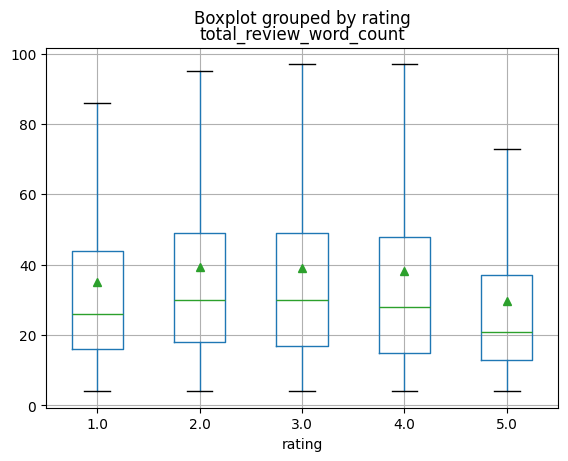

In [83]:
df["total_review_word_count"] = df["embedding_text"].apply(lambda x: len(x.split(" ")))
df.boxplot(column="total_review_word_count", by="rating", showfliers=False, showmeans=True)

<Axes: title={'center': 'total_review_word_count'}, xlabel='rating'>

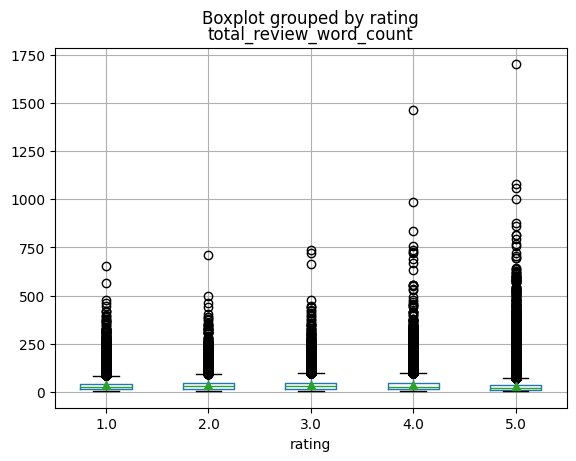

In [84]:
df.boxplot(column="total_review_word_count", by="rating", showfliers=True, showmeans=True)

In [85]:
df["total_review_word_count"].describe()

count    636206.000000
mean         31.232363
std          30.030104
min           4.000000
25%          13.000000
50%          22.000000
75%          39.000000
max        1701.000000
Name: total_review_word_count, dtype: float64

In [86]:
# _, bind_edges = np.histogram(df["rating"], bins=[1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.])
num_bins = 5
bins = [0.,1., 2., 3., 4., 5.,]
df["rating_bins"], rating_bins = pd.cut(df["rating"], bins=bins,labels=False, retbins=True)
print(rating_bins)
df.head(25)

[0. 1. 2. 3. 4. 5.]


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,embedding_text,review_word_count,title_word_count,__index_level_0__,rating_bins,total_review_word_count
0,5.0,Beautiful colors,I bought one for myself and one for my grandda...,[],B08GPJ1MSN,B08GPJ1MSN,AF7OANMNHQJC3PD4HRPX2FATECPA,1621607495111,1,True,"Title: beautiful colors, Text: i bought one fo...",10,2,0,4,14
1,5.0,You simply must order order more than one!,I've ordered three bows so far. Have not been ...,[],B084TWHS7W,B084TWHS7W,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,1587762946965,0,True,Title: you simply must order order more than o...,101,8,1,4,111
2,5.0,Great,As pictured. Used a frame from the dollar stor...,[],B07V3NRQC4,B07V3NRQC4,AEYORY2AVPMCPDV57CE337YU5LXA,1591448951297,0,True,"Title: great, Text: as pictured. used a frame ...",11,1,2,4,14
3,5.0,Well made and so beautiful,"This is beyond beautiful. So shiny, the size i...",[],B071ZMDK26,B071ZMDK26,AEINY4XOINMMJCK5GZ3M6MMHBN6A,1559438079784,2,True,"Title: well made and so beautiful, Text: this ...",56,5,3,4,63
4,5.0,Smells just like the real thing!,Oh wow what a pleasant surprise! This smells g...,[],B01MPVZ4YP,B01MPVZ4YP,AGCPAPUHXYA3EEIL2KGSQTGO5HRA,1546906331674,1,True,"Title: smells just like the real thing!, Text:...",36,6,4,4,44
5,5.0,These are beautiful,I have several of these prints. Yes the size i...,[],B09ZXMD847,B09ZXTLVWP,AFGNIWCBLQT2QIXXKIW7Q6VREZRQ,1668323464824,29,False,"Title: these are beautiful, Text: i have sever...",93,3,5,4,98
6,5.0,friend said it was very nice,purchased for a friend who lost her dad and sh...,[],B076GSPNYQ,B076GSPNYQ,AHGAOIZVODNHYMNCBV4DECZH42UQ,1524581521660,0,False,"Title: friend said it was very nice, Text: pur...",12,6,6,4,20
7,5.0,Very nice as a gift to someone who lost a doggy,Sent as a gift to a friend who lost her belove...,[],B01HSX8116,B01HSX8116,AHGAOIZVODNHYMNCBV4DECZH42UQ,1492223984000,0,True,Title: very nice as a gift to someone who lost...,18,11,7,4,31
8,5.0,Exactly What I Wanted!,I came across this fun sign while looking for ...,"[{'attachment_type': 'IMAGE', 'large_image_url...",B07VCLV7VM,B0BJ468MS9,AEVZVWZP3S2J57XSTFN5LPQNOONA,1641443001749,0,True,"Title: exactly what i wanted!, Text: i came ac...",48,4,8,4,54
9,5.0,fair trade necklace,"This is a very lovely, fair trade necklace mad...",[],B07PWBRXJG,B07PWBRXJG,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1607196089380,1,True,"Title: fair trade necklace, Text: this is a ve...",62,3,9,4,67


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636206 entries, 0 to 636205
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rating                   636206 non-null  float64
 1   title                    636121 non-null  object 
 2   text                     635964 non-null  object 
 3   images                   636206 non-null  object 
 4   asin                     636206 non-null  object 
 5   parent_asin              636206 non-null  object 
 6   user_id                  636206 non-null  object 
 7   timestamp                636206 non-null  int64  
 8   helpful_vote             636206 non-null  int64  
 9   verified_purchase        636206 non-null  bool   
 10  embedding_text           636206 non-null  object 
 11  review_word_count        636206 non-null  int64  
 12  title_word_count         636206 non-null  int64  
 13  __index_level_0__        636206 non-null  int64  
 14  rati

In [88]:
df.to_csv("amazon_review_xgboost.csv", index=False)